# Exercises part I: discretization

While discrete-time simulations of continuous models should be avoided as much as possible, they remain incredibly common in practice because they are conceptually simply to implement. (Note that they are not actually simpler: Event-driven simulations often require less coding and calibration!) It is therefore useful to know what the effect and danger of discretization can look like.

Consider the code below, which compares three simulations of a continuous-time logistic growth model: discrete-time agent-based, discrete-time composition, and next-reaction method simulations.

/var/folders/qs/h2k9jxts0n34jj1zq8z7dvtw0000gn/T/ipykernel_10182/543556504.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['ggplot', 'seaborn-talk'])


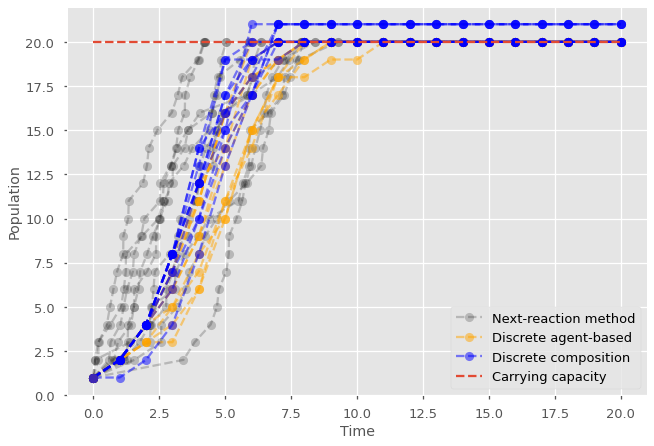

In [34]:
import random
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['ggplot', 'seaborn-talk'])

#parameters
capacity = 20.0
growth_rate = 1.0/capacity

#Pick timestep based on parameters and the criteria above
dt = 1.0/(growth_rate*capacity)
tmax = 20

#next-reaction method
for sims in range(10):
    t=0
    population = 1
    history_nr = np.ones(1)
    times = np.zeros(1)
    while t<tmax:
        #calculate rate 
        R = population*growth_rate*(capacity-population)
        #draw time to next event and event type
        if R>0.0:
            tau = np.random.exponential(scale=1/R)
            #update history
            population+=1
            t = t+tau
            history_nr = np.append(history_nr, population)
            times = np.append(times, t)
        else:
            history_nr = np.append(history_nr, population)
            times = np.append(times, t)
            break
    #print time series
    plt.plot(times,history_nr, marker="o", ls='--', color='black', alpha=0.2)

#agent-based simulation
for sims in range(10):
    population = 1
    history_ab = np.ones(1)
    #for each generation
    for t in range(int(tmax/dt)):
        #for each active cell
        for agent in range(population):
            #test division
            if random.random() < growth_rate*(capacity-population)*dt:
                population += 1
        #update history
        history_ab = np.append(history_ab, population)
    #print time series
    plt.plot(dt*np.arange(len(history_ab)),history_ab, marker="o", ls='--', color='orange', alpha=0.5)
    
    
#composition simulation
for sims in range(10):
    population = 1
    history_comp = np.ones(1)
    #for each generation
    for t in range(int(tmax/dt)):
        #calculate and add the number of reproduction
        prob = growth_rate*(capacity-population)*dt
        if prob>=0.0:
            population += np.random.binomial(population, growth_rate*(capacity-population)*dt)
        #update history
        history_comp = np.append(history_comp, population)
    #print time series
    plt.plot(dt*np.arange(len(history_comp)),history_comp, marker="o", ls='--', color='blue', alpha=0.5)


#add null simulation with label in legend and label the axes
plt.plot(0,1, marker="o", ls='--', color='black', alpha=0.2, label='Next-reaction method')
plt.plot(0,1, marker="o", ls='--', color='orange', alpha=0.5, label='Discrete agent-based')
plt.plot(0,1, marker="o", ls='--', color='blue', alpha=0.5, label='Discrete composition')
#plot carrying capacity
plt.hlines(capacity, 0, tmax, linestyles='--', label='Carrying capacity')
plt.legend()
plt.ylabel('Population')
plt.xlabel('Time')
plt.show()

Do they look different? Can you figure out why? Which one is giving us the right answer? To break down the different issues at play, you may want to try the following:
* Average the simulations over multiple realizations and ask how long it takes for the population to reach carrying capacity. Why are they different?
* Inspect the values produced. Do they confirm our intuition of what logistic growth should be doing?
* Inspect the code. Are there some checks implemented to avoid getting errors?
* Play with the discretization of the first two methods. Are there values such that the discrete simulations are close enough to the continuous-time process? If so, which ones?